In [ ]:
import numpy as np
import pandas as pd
from skimage import io
from scipy.spatial import distance
#from sklearn.cluster import KMeans
from sklearn import preprocessing

In [ ]:
def euclid_distance(X, centroids, N, K):
  distances = np.zeros((N, K))
  for i in range(K):
    distances[:,i] = (((X - centroids[i])**2).sum(axis = 1))**(1/2)
    #distances[:,i] = np.sqrt(((X - centroids[i])**2).sum(axis = 1))
    #distances[:, i] = np.sqrt(np.sum((X - centroids[i])**2, axis = 1))
  return distances

In [ ]:
class KMeans:
  def __init__(self, K = 2, iters = 1000):
    self.K = K
    self.centroids = None
    self.closest = None
    self.iters = iters

  def fit(self, X):

    N = X.shape[0]
    self.centroids = X[np.random.choice(N, self.K, replace = False)]

    self.closest = np.zeros(N).astype(int)

    converged = False

    while not converged:

      old_closest = self.closest

      distances = euclid_distance(X, self.centroids, N, self.K)
      #distances = distance.cdist(X, self.centroids)
      #get distances of each point from the centroids
      self.closest = np.argmin(distances, axis = 1)
      #argmin returns index of the minimum value along an axis.

      for i in range(self.K):
        #self.centroids[i, :] = X[self.closest == i].mean(axis = 0)
        self.centroids[i, :] = np.mean(X[self.closest == i], axis = 0)
        #centroids stores the means of a cluster.

      if all(self.closest == old_closest):
        converged = True

      self.iters = self.iters - 1

      if self.iters % 10 == 0:
        print(self.iters)
        print(self.centroids)
      if self.iters == 0:
        break
    #return self.centers, self.closest,

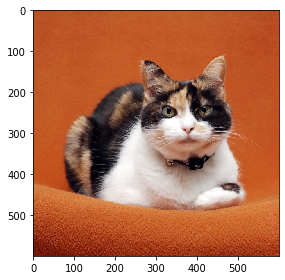

'\nfor i in range(image.shape[0]):\n  for j in range(image.shape[1]):\n      image[i][j] = round(image[i][j], 2)\n'

In [ ]:
#Read the image
image = io.imread('original_image.jpg')
io.imshow(image)
io.show()

#Dimension of the original image
rows = image.shape[0]
cols = image.shape[1]

#Flatten the image
image = image.reshape(rows*cols, 3)



#image = preprocessing.StandardScaler(with_mean = False).fit_transform(image)

maxx = image.max()
#print(maxx)

image = image/maxx
#image = image.astype(float)
'''
for i in range(image.shape[0]):
  for j in range(image.shape[1]):
      image[i][j] = round(image[i][j], 2)
'''



In [ ]:
image

array([[1.        , 0.95294118, 0.87843137],
       [1.        , 0.95294118, 0.87843137],
       [1.        , 0.95294118, 0.87843137],
       ...,
       [0.55686275, 0.12941176, 0.01568627],
       [0.56862745, 0.14117647, 0.01960784],
       [0.65490196, 0.21960784, 0.10980392]])

In [ ]:
#Implement k-means clustering to form k clusters
kmeans = KMeans(K = 16, iters = 50)
kmeans.fit(image)

#Replace each pixel value with its nearby centroid

40
[[0.19974491 0.14277479 0.14750049]
 [0.72530318 0.30954818 0.13039401]
 [0.80714257 0.75573424 0.73050933]
 [0.88531417 0.85654387 0.84442305]
 [0.8262157  0.47294364 0.24751507]
 [0.34637474 0.26009278 0.23880449]
 [0.47796537 0.10110644 0.03017528]
 [0.65255129 0.24993042 0.10829668]
 [0.58153824 0.17820696 0.0649113 ]
 [0.96194983 0.94997156 0.93821662]
 [0.67489822 0.51880022 0.43739367]
 [0.74710838 0.63949408 0.57533932]
 [0.54643097 0.39246623 0.32222015]
 [0.7550311  0.34048358 0.14353499]
 [0.77512001 0.37336074 0.16864052]
 [0.06567868 0.04255864 0.06586065]]
30
[[0.21419667 0.15483727 0.15733626]
 [0.73275955 0.31617752 0.13277755]
 [0.80381709 0.75054393 0.72392849]
 [0.88257564 0.85313523 0.84070439]
 [0.83144535 0.48722467 0.26029573]
 [0.36312074 0.27188647 0.24684522]
 [0.47384501 0.09851801 0.02932159]
 [0.65441176 0.25083212 0.10810253]
 [0.57824552 0.17500465 0.06306841]
 [0.96079312 0.94851574 0.93683637]
 [0.67226016 0.51630312 0.43539447]
 [0.7441045  0.633498

In [ ]:
kmeans.centroids

array([[0.22084587, 0.16033672, 0.16184491],
       [0.73747995, 0.32042969, 0.1342259 ],
       [0.80363286, 0.75039867, 0.72382552],
       [0.88232156, 0.8528113 , 0.84034634],
       [0.8341075 , 0.49727739, 0.27049096],
       [0.37239059, 0.27826007, 0.25101729],
       [0.47974048, 0.10231851, 0.03060736],
       [0.66290955, 0.25925008, 0.11260662],
       [0.58613036, 0.18212342, 0.06704757],
       [0.96071237, 0.94838363, 0.93670505],
       [0.67313621, 0.51822767, 0.43776184],
       [0.74467925, 0.63447663, 0.56887145],
       [0.55772202, 0.39971441, 0.3267724 ],
       [0.76322979, 0.35354006, 0.1527647 ],
       [0.80384088, 0.41971251, 0.20281667],
       [0.07417426, 0.04842258, 0.07063966]])

In [ ]:
kmeans.closest

array([9, 9, 9, ..., 8, 8, 7])

In [ ]:
kmeans.centroids[kmeans.closest]

array([[0.96071237, 0.94838363, 0.93670505],
       [0.96071237, 0.94838363, 0.93670505],
       [0.96071237, 0.94838363, 0.93670505],
       ...,
       [0.58613036, 0.18212342, 0.06704757],
       [0.58613036, 0.18212342, 0.06704757],
       [0.66290955, 0.25925008, 0.11260662]])

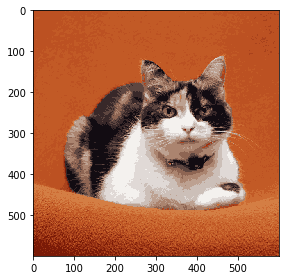

In [ ]:
compressed_image = kmeans.centroids[kmeans.closest]
compressed_image = compressed_image * maxx
compressed_image = np.clip(compressed_image.astype('uint8'), 0, 255)
compressed_image = compressed_image.reshape(rows, cols, 3)
#compressed_image = compressed_image.reshape(compressed_image.shape[0], compressed_image.shape[1], compressed_image.shape[2])
#Save and display output image
io.imsave('compressed_image.jpg', compressed_image)
io.imshow(compressed_image)
io.show()